In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
#from scipy import interp
%matplotlib inline

In [7]:
mu = 1/40.
b = 20
F2 = 5.3*np.log(2)
C0=230.

In [ ]:
def vectorfield(w,t,p):
    """
    Arguments:
    w :  vector of the state variables:
         w = [CO2,L]
           t :  time
           p :  vector of the parameters:
                     p = [a,Tcharney]
                     a = ice/orb sens m SLR/(high lat W/m2) [0 to 200 m over a cycle]
                     
                     Tcharney = Charney sensitivity
    """
    # Fixed parameters
    b = 20 #ppm/K
    tau_L = 10.  #in kyears
    tau_C = 3. #in kyears
    mu=1/40. #W/m^2/m Sea level
    
   
    lambda_planck = -3.2 #Planck feedback Watts/m^2
    
    C0 = 230.
    


        # ODE solver parameters
    
    C,L = w #ANOMALIES
    a,Tcharney = p
    F2 = 5.3*np.log(2)
    
    
    F_I = lambda t: 30*np.sin(np.pi*t/40.)
    #print LI
    
   
    T = (mu*L+5.3*np.log((C+C0)/C0))*Tcharney/F2
    f = [1/tau_C*(b*T-C),\
        1/tau_L*(F_I(t)+a*T-L)]
   
    
    return f
  

In [ ]:
  

from scipy.integrate import odeint

def SolveDiffEq(params):
   # a,b = params
    
    #Initial conditions

    C0=0
    L0=0

    # ODE solver parameters
    abserr = 1.0e-8
    relerr = 1.0e-6
    stoptime = 500
    numpoints = 1000

    # Create the time samples for the output of the ODE solver.
    # I use a large number of points, only because I want to make
    # a plot of the solution that looks nice.
    t = np.linspace(0,stoptime,numpoints)
    #t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
    
    


    p = params
    w0 = [C0,L0]
    
    wsol = odeint(vectorfield, w0, t, args=(p,),atol=abserr, rtol=relerr)
    return wsol

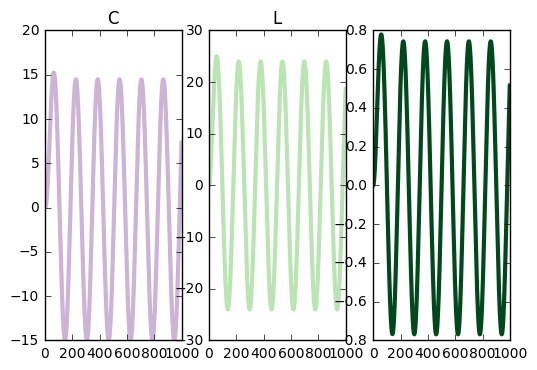

In [9]:
a = 1
Tcharney = 3

wsol = SolveDiffEq([a,Tcharney])
cmap = cm.PRGn
C = wsol[:,0]
L = wsol[:,1]
plt.subplot(1,3,1)
plt.plot(C,color=cmap(.33),lw=3)
plt.title("C")
plt.subplot(1,3,2)
plt.plot(L,color=cmap(.66),lw=3)
plt.title("L")
plt.subplot(1,3,3)
T = (mu*L+5.3*np.log((C+C0)/C0))*Tcharney/F2
plt.plot(T,color=cmap(.99),lw=3)